<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">IMPORT THE NECESSARY LIBRARIES</p>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib import style
plt.style.use('seaborn-v0_8-pastel')
import warnings
warnings.filterwarnings('ignore')


print('Modules have been imported!')

Modules have been imported!


<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">CUSTOMER SEGMENTATION</p>

* In this project, I will be performing an unsupervised clustering of data on the mall customer's records . Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">LOAD THE DATASET</p>

In [1]:
df= pd.read_csv('/Users/brenden/Downloads/Dataset/CSV/Mall_Customers.csv')

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">DISPLAY THE FIRST & LAST 5 ROWS OF THE DATASET</p>

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">DISPLAY DETAILED INFO OF THE DATASET</p>

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* The dadaset has 5 columns & 200 rows. It's quite a small dataset.
* It also has the following data types, 4 int type columns & 1 object type

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">DATA CLEANING</p>

In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

* In this section of the project l check for missing values & duplicate values .
* The dataset is clean , it does not have missing or duplicate values                                       

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">EXPLORATORY  DATA 
 ANALYSIS</p>

* In this next bit, l explore the datasets statistics

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* Here l can noticed some discrepancies in the dataset.
* The mean of feature **Annual Income (k$)** & it's max values are indicative of outliers
* I proceed to check for outliers using the boxplot

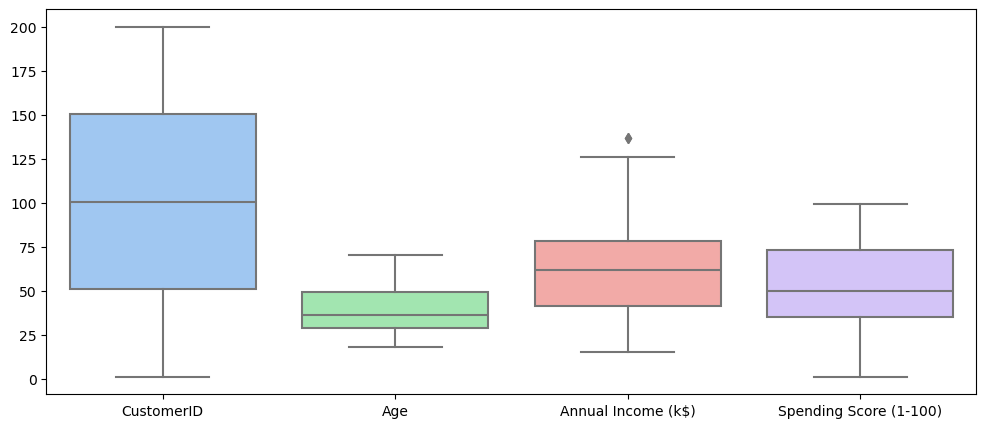

In [9]:
plt.figure(figsize=(12,5))
sns.boxplot(df)
plt.show()

* As suspected the **Annual Income (k$)** column has an outlier
* In the next step l remove the outlier by implementing the Inter Quartile Range method
* I then display the shape of  dataset with outliers & the one which l have just filtered & is outlier free.

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">REMOVING OUTLIERS</p>

In [10]:
Q1= np.percentile(df['Annual Income (k$)'],25)
Q3= np.percentile(df['Annual Income (k$)'],75)
IQR= Q3-Q1
lwr_bound= Q1-1.5*IQR
upr_bound= Q3+1.5*IQR
outliers= df[(df['Annual Income (k$)'] < lwr_bound) | (df['Annual Income (k$)'] > upr_bound)]
filtered= df[(df['Annual Income (k$)'] >= lwr_bound) & (df['Annual Income (k$)'] <=upr_bound)]
print(f'Outliers : {outliers.shape}')
print(f'Filtered : {filtered.shape}')

Outliers : (2, 5)
Filtered : (198, 5)


* The dataset with outliers contains 2 rows 
* The filtered row now has 198 rows, free of outliers

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">FEATURE SELECTION</p>

* At this stage l select the 2 features l will use in the clustering process
* **Annual Income (k$)** & **Spending Score (1-100)**

In [11]:
df= filtered[['Annual Income (k$)','Spending Score (1-100)']]
df.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


* Here l check the distribution the of the columns & they both have a normal distribution

In [12]:
num= df.select_dtypes('int').columns

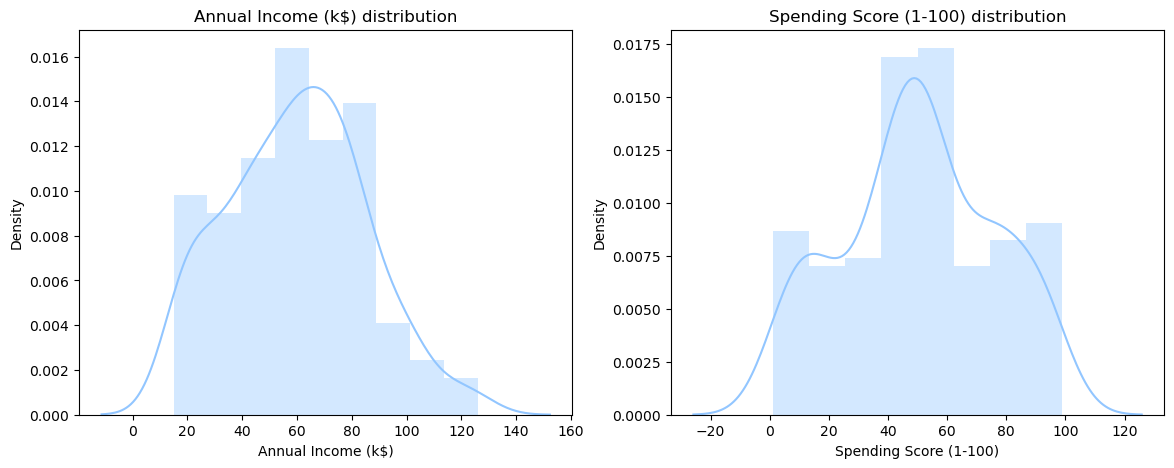

In [13]:
plt.figure(figsize=(14,5))
for i,col in enumerate(num):
    plt.subplot(1,2, i+1)
    sns.distplot(df[col])
    plt.title(f'{col} distribution')

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;"> DATA SCALING</p>

* In this section l scale the features so that they can be on the same scale , this improves the model's performance.

In [14]:
sc= StandardScaler()

df[:]= sc.fit_transform(df)

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;"> TRAIN THE MODEL</p>

In [15]:
means= KMeans()
means.fit(df)

KMeans()

In [16]:
means.fit_transform(df)

array([[1.96478872, 3.00994338, 1.647861  , ..., 1.37419561, 3.69802375,
        3.970241  ],
       [2.36983789, 2.50429698, 0.4027382 , ..., 1.73306484, 4.29632675,
        3.58772362],
       [2.46587009, 3.84781912, 2.90582736, ..., 2.15962765, 3.65815436,
        4.63718535],
       ...,
       [2.56648811, 1.67080728, 3.77025498, ..., 3.07818868, 2.26496978,
        0.60145864],
       [2.56481342, 2.8344351 , 4.49158987, ..., 3.24917959, 0.7978893 ,
        2.28313761],
       [2.69180617, 1.92997953, 4.01529176, ..., 3.24392829, 2.14937241,
        0.88934175]])

* Here the our **KMeans** model has been trained
* I then use the sum of square distances (WCSS) to determine the optimal k value for our clusters

In [17]:
wcss= []
for i in range(1,10):
    means= KMeans(n_clusters=i,init='k-means++')
    means.fit(df)
    wcss.append(means.inertia_)

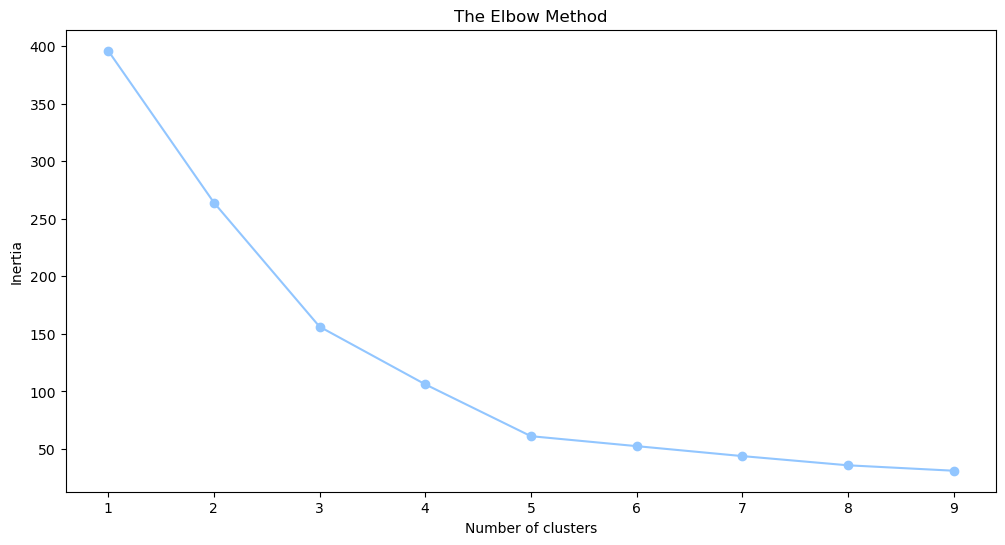

In [18]:
frame= pd.DataFrame({'Cluster':range(1,10),'wcss':wcss})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['wcss'], marker= 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

* The optimum number of k cluster is 5, the elbow appears at 5
* After obtaining the optimal number of clusters l then train the model with that number

In [19]:
means= KMeans(n_clusters=5,random_state= 42,init='k-means++')
y_pred= means.fit_predict(df)

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">MODEL EVALUATION</p>

* Here l use the silhouette score to evaluate the model 
* The silhouette score is a metric used to evaluate the quality of clustering performed by the K-Means algorithm. It measures how well each data point fits into the cluster it has been assigned to.
The silhouette score ranges from -1 to 1, where:

* A score of 1 indicates that the data point is well-matched to its assigned cluster and poorly-matched to neighboring clusters.
* A score of 0 indicates that the data point is on the boundary between two clusters.
* A score of -1 indicates that the data point is misassigned.
* The model achieves a score of 60 which is very good , incicating the clusters are well matched

In [21]:
print(silhouette_score(df,means.labels_,metric='euclidean'))

0.5599199830769206


In [22]:
df['Clusters']= y_pred

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">CUSTOMER PROFILING</p>

* In this section of the project l profile the customers based on the Income & Spending score

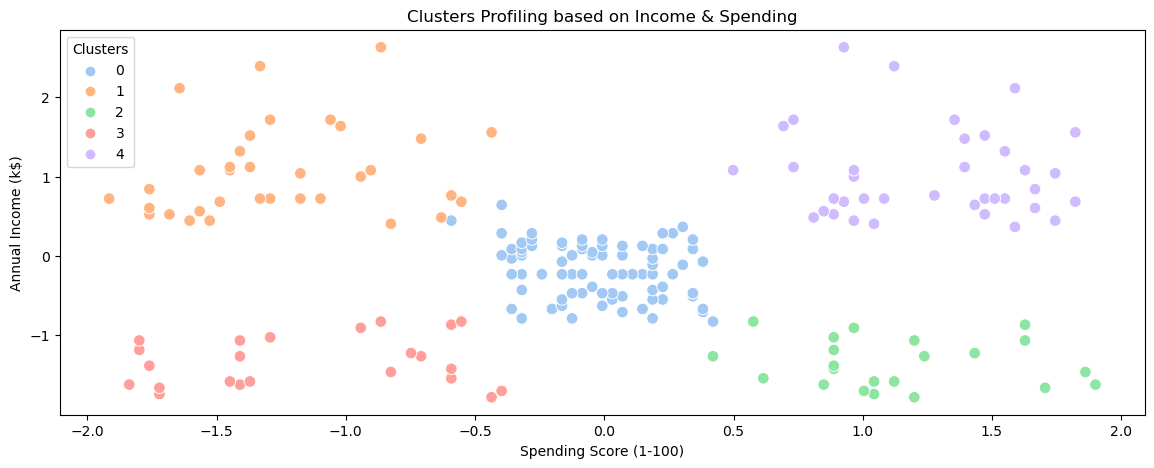

In [24]:
plt.figure(figsize=(14,5))
sns.scatterplot(df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Clusters',palette='pastel',s=70)
plt.title('Clusters Profiling based on Income & Spending')
plt.show()

**Cluster 0** - Average Income & Average Spending

**Cluster 1** - High Income & Low Spending

**Cluster 2** -Low Income & High Spending

**Cluster 3** -Low Income & Low Spending

**Cluster 4** -High Income & High Spending

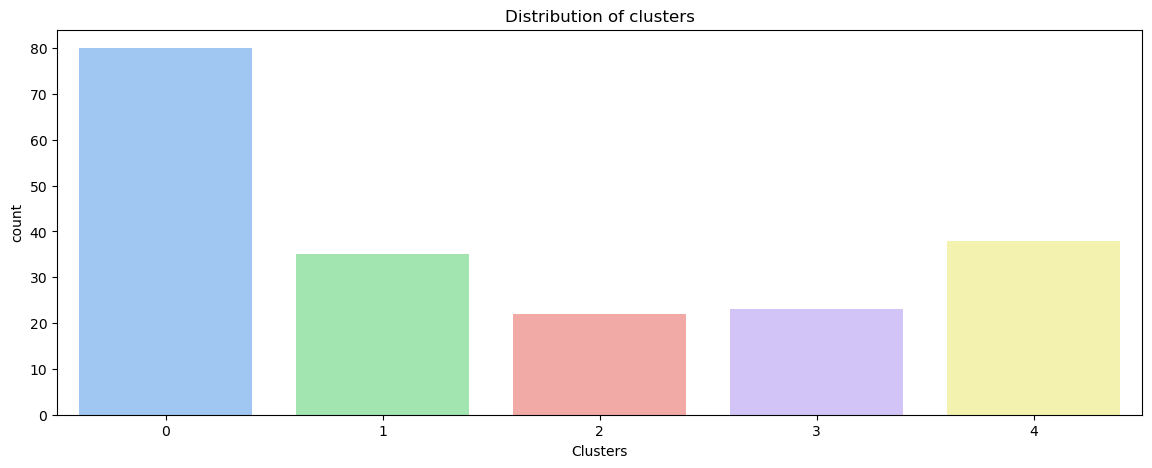

In [25]:
plt.figure(figsize=(14,5))
sns.countplot(x=df['Clusters'])
plt.title('Distribution of clusters')

plt.show()

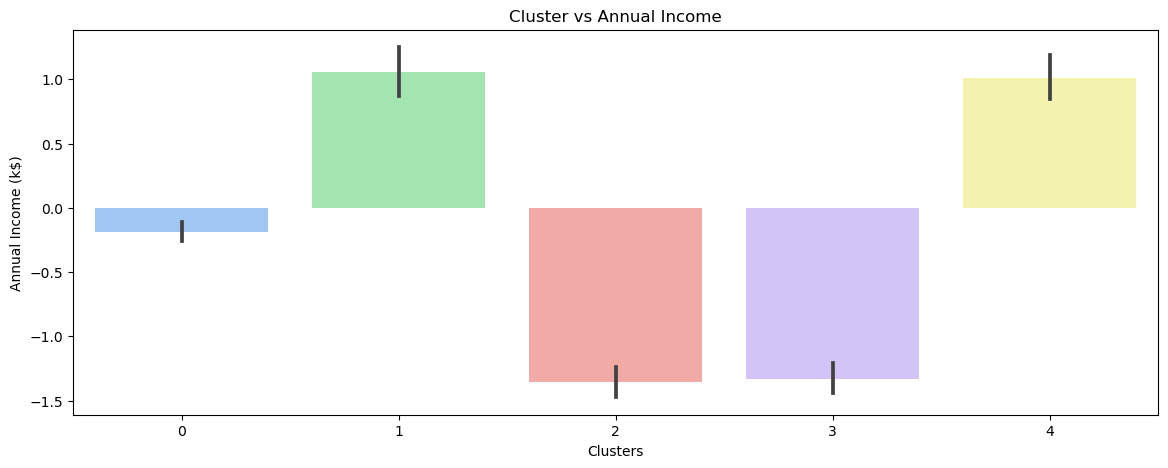

In [27]:
plt.figure(figsize=(14,5))
sns.barplot(data=df,x='Clusters',y='Annual Income (k$)')
plt.title('Cluster vs Annual Income')

plt.show()

* As seen in the previous chart cluster 1 & 4 has high Income earners while 2 & 3 are low income earners. Cluster 0 is has avg income earners

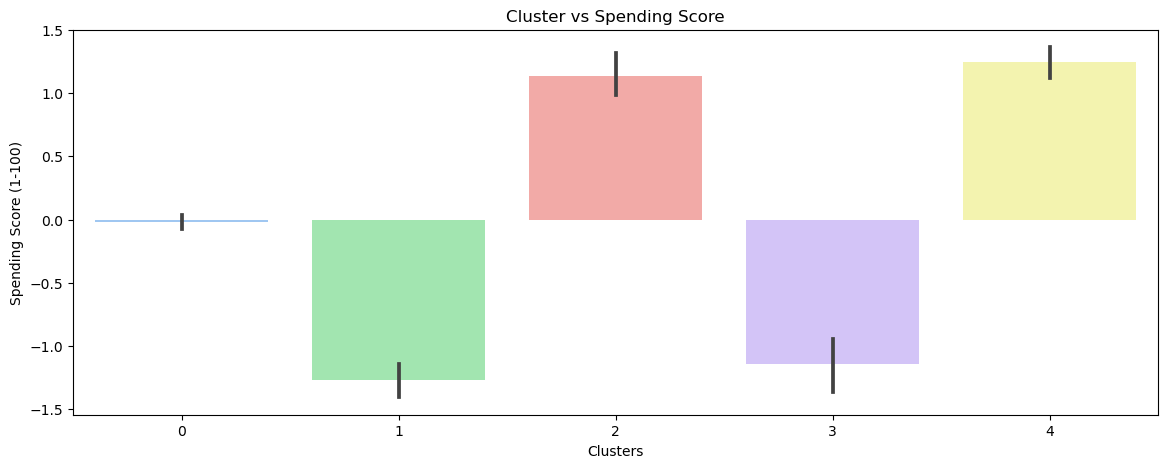

In [28]:
plt.figure(figsize=(14,5))
sns.barplot(data=df,x='Clusters',y='Spending Score (1-100)')
plt.title('Cluster vs Spending Score')

plt.show()

* Cluster 2 & 4 has high spenders while 1 & 3 don't spend much less. Cluster 0 has avg spenders

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">CONCLUSION</p>

In this project, I performed unsupervised clustering. I removed outliers followed by  feature scaling then kmeans clustering. I came up with 5 clusters and further used them in profiling customers in clusters according to their income/spending. This can be used in planning better marketing strategies.

* If you enjoyed this notebook ,please leave a star😉 & as always happy analyzing!

<a id="1"></a>
<p style="background-color:#F5DEB3;font-family:newtimeroman;color:#505050;font-size:150%;text-align:center;border-radius:10px10px;">THE END!!!</p>